<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup-&amp;-Summary" data-toc-modified-id="Setup-&amp;-Summary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup &amp; Summary</a></span><ul class="toc-item"><li><span><a href="#Workflow" data-toc-modified-id="Workflow-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Workflow</a></span></li><li><span><a href="#Reference:" data-toc-modified-id="Reference:-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Reference:</a></span></li><li><span><a href="#Setup-my-kaggle-API" data-toc-modified-id="Setup-my-kaggle-API-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Setup my kaggle API</a></span></li><li><span><a href="#Import-everything" data-toc-modified-id="Import-everything-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Import everything</a></span></li></ul></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Read-CSV-data" data-toc-modified-id="Read-CSV-data-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Read CSV data</a></span></li><li><span><a href="#Image-array-to-images" data-toc-modified-id="Image-array-to-images-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Image array to images</a></span></li><li><span><a href="#Make-Data-bunch" data-toc-modified-id="Make-Data-bunch-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Make Data bunch</a></span></li></ul></li></ul></li><li><span><a href="#Train-Model" data-toc-modified-id="Train-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Train Model</a></span></li><li><span><a href="#Fine-tune-model" data-toc-modified-id="Fine-tune-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Fine tune model</a></span></li><li><span><a href="#Make-predictions" data-toc-modified-id="Make-predictions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Make predictions</a></span></li></ul></div>

# Setup & Summary

## Workflow

- data preparation: transfer df to images, the format that fastai can load
- fastai: 
    - learning rate finder, 30 epochs training  

## Reference: 
- https://www.kaggle.com/nitron/facial-keypoints-fastai-image-regression

## Setup my kaggle API

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"
os.environ['KAGGLE_USERNAME'] = "xxx"
os.environ['KAGGLE_KEY'] = "xxx"

## Import everything

In [2]:
import numpy as np 
import pandas as pd

from fastai.vision import *
from fastai import *

%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os
import shutil
import torch

rn_seed=1
np.random.seed(rn_seed)

# Load Data

Control Variables

In [3]:
train_path = Path('./data/fastai_train')
test_path = Path('./data/fastai_test')

### Read CSV data

In [4]:
root = Path('./data')

In [5]:
len(pd.read_csv(root/'training.csv'))

7049

In [6]:
id_lookup = pd.read_csv(root/'IdLookupTable.csv')
train_csv = pd.read_csv(root/'training.csv')
test_csv = pd.read_csv(root/'test.csv')

In [7]:
id_lookup.head()

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN


In [8]:
for c in train_csv.columns:
    if(train_csv[c].dtype!='object'):
        train_csv[c]=train_csv[c].fillna(train_csv[c].median())

In [9]:
len(train_csv)

7049

In [10]:
train_csv.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,...,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000
mean,66.359218,37.651059,30.306001,37.976641,59.257811,37.899533,73.274406,37.660882,36.651898,37.958820,...,48.374186,62.715884,63.212873,75.840500,32.955930,76.058293,47.928057,72.706601,48.569592,78.968864
std,3.445790,3.150692,3.080386,3.030830,1.528334,1.309824,1.931566,1.634136,1.332939,1.311357,...,4.280038,5.720567,2.314468,2.599481,2.249786,2.508036,1.887842,2.970112,4.259953,5.395201
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.084235,35.906648,28.788000,36.329459,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,46.602370,59.292697,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,46.584000,75.567671
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024349,39.254400,31.767416,39.562527,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,50.330437,66.492686,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,50.662249,82.222604
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [11]:
test_csv.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


### Image array to images 

Save train images

In [12]:
def save_str_img(strimg,w,h,flpath):
    px=255-np.array(strimg.split(),dtype=int)
    if(len(px)==w*h and len(px)%w==0 and len(px)%h==0):
        cpx = list(px.reshape(w,h))
        img = Image(Tensor([cpx,cpx,cpx]))
        img.save(flpath)
        return img
    else:
        raise Exception("Invalid height and width")

In [13]:
# make image folders
# shutil.rmtree(train_path)
train_path.mkdir(exist_ok=True)
test_path.mkdir(exist_ok=True)

- only save data for one time
- mute afterwards

In [14]:
# for index, train_row in train_csv.iterrows():
#     save_str_img(train_row.Image,96,96,train_path/(str(index)+'.jpg'))

# for index, test_row in test_csv.iterrows():
#     save_str_img(test_row.Image,96,96,test_path/(str(index)+'.jpg'))

### Make Data bunch

In [15]:
def get_locs(flname):
    index = int(flname.name[:-4])
    plist=[]
    coords=list(train_csv.loc[index])
    for i in range(len(coords)//2):
        plist.append([coords[i*2+1],coords[i*2]])
    return tensor(plist)
#     return tensor([coords[1],coords[0]])

In [16]:
# make points image data bunch
data = (PointsItemList.from_folder(train_path)
        .split_by_rand_pct(0.05,seed=rn_seed)
        .label_from_func(get_locs)
        .transform([],size=(96,96))
        .databunch(num_workers=0)
       )

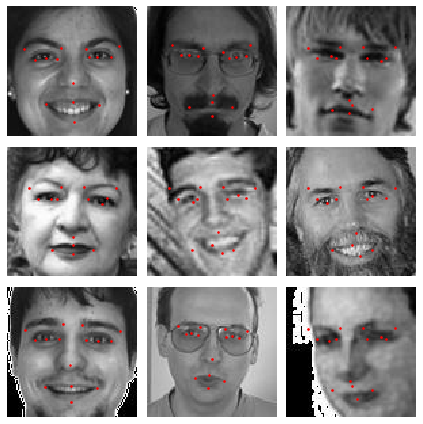

In [17]:
data.show_batch(3,figsize=(6,6))

# Train Model

In [18]:
# calculates distance between true and predictions
def mloss(y_true, y_pred):
    y_true=y_true.view(-1,15,2)
    
    y_true[:,:,0]=y_true[:,:,0].clone()-y_pred[:,:,0]
    y_true[:,:,1]=y_true[:,:,1].clone()-y_pred[:,:,1]
    
    y_true[:,:,0]=y_true[:,:,0].clone()**2
    y_true[:,:,1]=y_true[:,:,1].clone()**2
    
    return y_true.sum(dim=2).sum(dim=1).sum()

In [19]:
learn = cnn_learner(data,models.resnet152,loss_func=mloss)

In [21]:
learn.fit_one_cycle(10)

In [41]:
learn.show_results(rows=3,figsize=(6,6))

In [42]:
learn.save('s1_simple')

# Fine tune model

In [22]:
learn.load('s1_simple')

In [23]:
learn.unfreeze()

In [24]:
learn.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


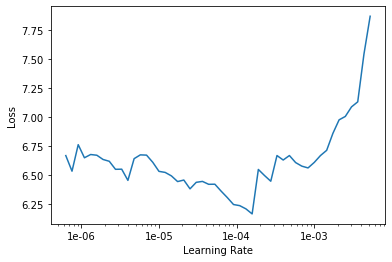

In [25]:
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(30,1e-4)

epoch,train_loss,valid_loss,time
0,6.250987,4.956032,00:36
1,5.734747,4.661420,00:36
2,5.302614,4.360019,00:36
3,4.596231,3.650794,00:36
4,4.002012,3.262419,00:36
5,3.454625,2.525209,00:36
6,3.074172,2.389297,00:36
7,2.935083,2.371313,00:36
8,2.788051,2.176108,00:36
9,2.569252,2.263585,00:36


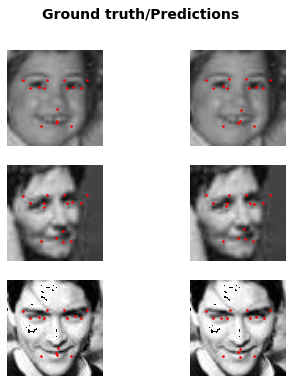

In [27]:
learn.show_results(rows=3,figsize=(6,6))

# Make predictions

Predict and display in one image

In [28]:
def flp(npa):
    for i in range(npa.shape[0]):
        if(i%2==1):
            tmp=npa[i]
            npa[i]=npa[i-1]
            npa[i-1]=tmp
    return npa

In [29]:
def get_coords(imgpnts):
    return ((imgpnts+1)*48).numpy()

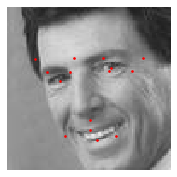

In [30]:
test_img = open_image(test_path/'1600.jpg')
pred = learn.predict(test_img)
test_img.show(y=pred[0])

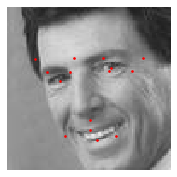

In [31]:
test_img = open_image(test_path/'1600.jpg')
pred = learn.predict(test_img)
test_img.show(y=ImagePoints(FlowField(test_img.size,torch.from_numpy(get_coords(pred[1])))))

Make predictions and save dataframe

In [32]:
a=list(train_csv.columns.values)
a.remove('Image')
a.append('ImageId')

In [33]:
test_preds = pd.DataFrame(columns=a)

In [34]:
from ipywidgets import IntProgress
from IPython.display import display

f = IntProgress(min=0, max=test_csv.count()[0]) # instantiate the bar
display(f)
for test_index in range(test_csv.count()[0]):
    timg = open_image(test_path/(str(test_index)+'.jpg'))
    pred = learn.predict(timg)
    a=np.abs(flp(get_coords(pred[1]).reshape(1,-1)[0]))
    a=np.append(a,test_csv.loc[test_index].ImageId)
    test_preds.loc[test_index]=a
    f.value+=1

IntProgress(value=0, max=1783)

In [35]:
test_preds.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,ImageId
count,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,...,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000
mean,65.918757,37.802653,30.192032,38.014865,59.247353,37.840487,73.199802,37.606790,36.513339,37.906913,...,62.660491,63.246345,75.646531,32.980062,75.913471,47.936811,72.492534,48.422178,78.762226,892.000000
std,3.198550,2.462964,2.393681,2.491086,0.804283,0.874278,1.143365,1.104164,0.719747,0.917343,...,4.797744,1.605416,2.009481,1.349344,2.000850,1.124569,2.360728,3.920309,4.513162,514.852082
min,33.040150,16.792934,4.054087,18.413555,48.899513,32.245903,62.190960,30.491146,31.984594,33.213791,...,35.342525,54.984501,66.807144,25.015022,66.155098,39.746490,61.589321,10.616861,41.400398,1.000000
25%,65.007210,36.217529,28.919208,36.413559,59.121819,37.708195,73.017311,37.447721,36.456190,37.781900,...,60.106913,62.999956,75.401325,32.771303,75.669086,47.748919,72.258904,46.708651,75.913486,446.500000
50%,66.178093,37.749905,30.188124,37.889568,59.288574,37.834110,73.187912,37.603947,36.597492,37.900921,...,63.257080,63.202927,75.628647,32.985668,75.877159,47.915779,72.486801,48.567661,78.610443,892.000000
75%,67.481598,39.286133,31.525146,39.476883,59.411530,37.956923,73.351860,37.745609,36.719570,38.020592,...,65.876751,63.410130,75.833958,33.191751,76.081993,48.086994,72.728992,50.413370,81.435284,1337.500000
max,74.408455,53.705738,44.300987,54.389832,66.310547,42.476173,82.150131,42.371964,39.811867,43.035114,...,77.300140,73.458954,86.714600,43.277134,87.377136,58.124393,85.349144,63.045670,93.411385,1783.000000


In [36]:
test_preds.ImageId=test_preds.ImageId.astype('int')
test_preds.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,ImageId
0,65.906494,38.304909,28.888744,36.773434,59.978333,38.101974,72.722595,38.955574,35.330315,37.332085,...,51.705330,63.839413,75.830048,32.456303,75.516968,48.725433,68.975670,48.480476,84.934456,1
1,67.170876,36.742180,27.436283,37.365360,60.291992,37.761200,73.703415,37.061111,34.031834,38.172390,...,58.887596,64.522263,75.164047,33.648190,76.352783,49.011559,72.511292,49.578083,86.290756,2
2,65.560883,36.577187,30.978149,37.823330,60.030075,37.531548,71.651390,36.675415,37.238979,38.541473,...,58.661980,64.019516,74.915665,36.068359,76.154694,49.972511,72.178986,49.530727,83.758781,3
3,65.630699,38.716110,31.296072,39.725067,59.087311,40.022717,72.336761,39.879959,36.823341,40.788147,...,53.833351,64.510139,77.008286,33.622406,78.218735,48.348953,71.794128,49.084595,81.412338,4
4,67.331985,36.827911,28.380838,37.980751,61.004597,37.276672,74.005867,37.420456,35.255314,38.153286,...,55.009678,64.790459,76.018661,34.620953,76.939430,49.116245,69.026909,49.165558,85.991623,5


In [37]:
sub = pd.DataFrame(columns=['RowId','Location'])
for index,row in id_lookup.iterrows():
    fname = row.FeatureName
    trow=test_preds.loc[test_preds['ImageId']==row.ImageId]
    sub.loc[index]=[row.RowId,trow.iloc[0][fname]]

In [38]:
sub.RowId=sub.RowId.astype('int')
sub.head()

,RowId,Location
0,1,65.906494
1,2,38.304909
2,3,28.888744
3,4,36.773434
4,5,59.978333


In [39]:
sub.to_csv("./data/sub_simple.csv",index=False)

In [40]:
!kaggle competitions submit -c facial-keypoints-detection -f data/sub_simple.csv -m "fastai simple"

100%|█████████████████████████████████████████| 629k/629k [00:03<00:00, 208kB/s]
Successfully submitted to Facial Keypoints Detection